In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#end goal is calculating jaccard similarity scores for tissues

# practice for fig 4

In [2]:
df = pd.read_csv("../data/fig_4_data_on_relevent_genes_in_29_tissues.csv")

In [3]:
df

,Tissue,Transcription Factor,FUGUE Score,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Adipose_Tissue,NR1H3,0.962324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adipose_Tissue,STAT5A,0.960867,NaN,Supplementary Table S4. Top 20 TRG transcripti...,NaN,NaN,NaN,NaN,NaN
2,Adipose_Tissue,PPARG,0.945495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adipose_Tissue,EBF1,0.941477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adipose_Tissue,EBF3,0.920992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
625,Vagina,STAT6,0.893148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,Vagina,ZNF511,0.889483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,Vagina,TP53,0.887970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,Vagina,STAT5B,0.887624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
column_labels = []
for gene in df["Transcription Factor"]:
    column_labels.append(gene)
    #i want the genes to be the column names

In [5]:
#no repeat column names, so refine the gene list and get rid of repeats
refined_labels = ["name"]
for i in range(len(column_labels)):
    if refined_labels.count(column_labels[i]) == 1:
        pass
    else:
        refined_labels.append(column_labels[i])

In [6]:
refined_labels

['name',
 'NR1H3',
 'STAT5A',
 'PPARG',
 'EBF1',
 'EBF3',
 'ZNF423',
 'SMAD3',
 'MECOM',
 'NFKB1',
 'HLX',
 'ETS1',
 'SMAD1',
 'ARNT',
 'MYC',
 'NR3C1',
 'NR5A2',
 'ZNF521',
 'JUN',
 'RELA',
 'KLF11',
 'SMAD4',
 'FOXK2',
 'MLXIPL',
 'PEG3',
 'NR5A1',
 'NR0B1',
 'GATA6',
 'ZNF219',
 'ZBTB21',
 'LEF1',
 'FOXO4',
 'TBX3',
 'STAT2',
 'LCOR',
 'FOXK1',
 'CEBPZ',
 'ZNF431',
 'NFE2L2',
 'FOSL2',
 'NR2F1',
 'JAZF1',
 'MSX2',
 'MAFG',
 'PITX2',
 'GATA2',
 'SP1',
 'NPAS2',
 'HOXA1',
 'ZNF350',
 'TEAD1',
 'HOXA10',
 'GTF3A',
 'STAT6',
 'FOXF1',
 'CDC5L',
 'TP53',
 'ZNF266',
 'GTF2I',
 'ATF4',
 'ZNF746',
 'AKAP8',
 'ZNF444',
 'IKZF1',
 'SRCAP',
 'PIN1',
 'NR2C2',
 'MAX',
 'HIF1A',
 'STAT3',
 'RARA',
 'ZNF224',
 'DNTTIP1',
 'ZSCAN9',
 'NFAT5',
 'TRERF1',
 'TEAD2',
 'ELK4',
 'CUX1',
 'MAFK',
 'SKI',
 'SRF',
 'ZBTB16',
 'YBX1',
 'KLF13',
 'NFYB',
 'FOXC2',
 'HEY2',
 'ZKSCAN5',
 'THRA',
 'NKRF',
 'STAT5B',
 'KDM2A',
 'POU3F2',
 'ZNF526',
 'ZFPM2',
 'CTCF',
 'SP100',
 'FOXG1',
 'OLIG2',
 'SETDB1',
 'PU

In [7]:
#make the data frame that will eventually be full of zeros and ones
similarity_df = pd.read_csv("../data/similarity_between_29_tissues_data_for_fig_4.csv", names=refined_labels)
similarity_df = similarity_df.set_index('name')

In [8]:
similarity_df

,NR1H3,STAT5A,PPARG,EBF1,EBF3,ZNF423,SMAD3,MECOM,NFKB1,HLX,...,PGR,CENPT,TBX2,ZNF362,MITF,HES1,LHX4,GRHL1,ZNF511,REL
name,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrenal_Gland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bladder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood_Vessel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cervix_Uteri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#give me a list of the tissues
tissues = np.unique(df["Tissue"])

In [10]:
#making list of tissues a list instead of an array
#not using
tissue_list = []
for i in tissues:
    tissue_list.append(i)

In [11]:
#make each tissue a list itself
#not using this
def extractDigits(lst):
    return [[el] for el in lst]
                  
tissue_list = extractDigits(tissue_list)
tissue_list

[['Adipose_Tissue'],
 ['Adrenal_Gland'],
 ['Bladder'],
 ['Blood'],
 ['Blood_Vessel'],
 ['Brain'],
 ['Breast'],
 ['Cervix_Uteri'],
 ['Colon'],
 ['Esophagus'],
 ['Fallopian_Tube'],
 ['Heart'],
 ['Kidney'],
 ['Liver'],
 ['Lung'],
 ['Muscle'],
 ['Nerve'],
 ['Ovary'],
 ['Pancreas'],
 ['Pituitary'],
 ['Prostate'],
 ['Salivary_Gland'],
 ['Skin'],
 ['Small_Intestine'],
 ['Spleen'],
 ['Stomach'],
 ['Testis'],
 ['Thyroid'],
 ['Uterus'],
 ['Vagina']]

In [12]:
Adipose_Tissue = []
Adrenal_Gland = []
Bladder = []
Blood = []
Blood_Vessel = []
Brain = []
Breast = []
Cervix_Uteri = []
Colon = []
Esophagus = []
Fallopian_Tube = []
Heart = []
Kidney = []
Liver = []
Lung = []
Muscle = []
Nerve = []
Ovary = []
Pancreas = []
Pituitary = []
Prostate = []
Salivary_Gland = []
Skin = []
Small_Intestine = []
Spleen = []
Stomach = []
Testis = []
Thyroid = []
Uterus = []
Vagina = []

In [14]:
for j in range(len(df["Transcription Factor"])):
    #print(j)
    if df["Tissue"][j] == "Adipose_Tissue":
        Adipose_Tissue.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Adrenal_Gland":
        Adrenal_Gland.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Bladder":
        Bladder.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Blood":
        Blood.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Blood_Vessel":
        Blood_Vessel.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Brain":
        Brain.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Breast":
        Breast.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Cervix_Uteri":
        Cervix_Uteri.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Colon":
        Colon.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Esophagus":
        Esophagus.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Fallopian_Tube":
        Fallopian_Tube.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Heart":
        Heart.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Kidney":
        Kidney.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Liver":
        Liver.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Lung":
        Lung.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Muscle":
        Muscle.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Nerve":
        Nerve.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Ovary":
        Ovary.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Pancreas":
        Pancreas.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Pituitary":
        Pituitary.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Prostate":
        Prostate.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Salivary_Gland":
        Salivary_Gland.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Skin":
        Skin.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Small_Intestine":
        Small_Intestine.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Spleen":
        Spleen.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Stomach":
        Stomach.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Testis":
        Testis.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Thyroid":
        Thyroid.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Uterus":
        Uterus.append(df["Transcription Factor"][j])
    if df["Tissue"][j] == "Vagina":
        Vagina.append(df["Transcription Factor"][j])

In [15]:
#then i have lists of all of the genes in each tissue. next, i want to loop through each list and column
            #of my similarity data frame and say hey, if this gene (column) is in the list for adipose,
            #put a 1 in this position. if not, put a zero. should end up with a df of tissues on side
            #and genes on top and 1 at intersection where tissue does have that gene and a zero where it doesnt


In [16]:
for i in range(len(df["Transcription Factor"])):
    if Adipose_Tissue.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[0,i] = 1
    else:
        similarity_df.iloc[0,i] = 0
    if Adrenal_Gland.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[1,i] = 1
    else:
        similarity_df.iloc[1,i] = 0
    if Bladder.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[2,i] = 1
    else:
        similarity_df.iloc[2,i] = 0
    if Blood.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[3,i] = 1
    else:
        similarity_df.iloc[3,i] = 0
    if Blood_Vessel.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[4,i] = 1
    else:
        similarity_df.iloc[4,i] = 0
    if Brain.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[5,i] = 1
    else:
        similarity_df.iloc[5,i] = 0
    if Breast.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[6,i] = 1
    else:
        similarity_df.iloc[6,i] = 0
    if Cervix_Uteri.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[7,i] = 1
    else:
        similarity_df.iloc[7,i] = 0
    if Colon.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[8,i] = 1
    else:
        similarity_df.iloc[8,i] = 0
    if Esophagus.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[9,i] = 1
    else:
        similarity_df.iloc[9,i] = 0
    if Fallopian_Tube.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[10,i] = 1
    else:
        similarity_df.iloc[10,i] = 0
    if Heart.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[11,i] = 1
    else:
        similarity_df.iloc[11,i] = 0
    if Kidney.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[12,i] = 1
    else:
        similarity_df.iloc[12,i] = 0
    if Liver.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[13,i] = 1
    else:
        similarity_df.iloc[13,i] = 0
    if Lung.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[14,i] = 1
    else:
        similarity_df.iloc[14,i] = 0
    if Muscle.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[15,i] = 1
    else:
        similarity_df.iloc[15,i] = 0
    if Nerve.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[16,i] = 1
    else:
        similarity_df.iloc[16,i] = 0
    if Ovary.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[17,i] = 1
    else:
        similarity_df.iloc[17,i] = 0
    if Pancreas.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[18,i] = 1
    else:
        similarity_df.iloc[18,i] = 0
    if Pituitary.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[19,i] = 1
    else:
        similarity_df.iloc[19,i] = 0
    if Prostate.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[20,i] = 1
    else:
        similarity_df.iloc[20,i] = 0
    if Salivary_Gland.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[21,i] = 1
    else:
        similarity_df.iloc[21,i] = 0
    if Skin.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[22,i] = 1
    else:
        similarity_df.iloc[22,i] = 0
    if Small_Intestine.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[23,i] = 1
    else:
        similarity_df.iloc[23,i] = 0
    if Spleen.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[24,i] = 1
    else:
        similarity_df.iloc[24,i] = 0
    if Stomach.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[25,i] = 1
    else:
        similarity_df.iloc[25,i] = 0 
    if Testis.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[26,i] = 1
    else:
        similarity_df.iloc[26,i] = 0
    if Thyroid.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[27,i] = 1
    else:
        similarity_df.iloc[27,i] = 0
    if Uterus.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[28,i] = 1
    else:
        similarity_df.iloc[28,i] = 0
    if Vagina.count(df["Transcription Factor"][i]) == 1:
        similarity_df.iloc[29,i] = 1
    else:
        similarity_df.iloc[29,i] = 0

IndexError: iloc cannot enlarge its target object

In [17]:
similarity_df

,NR1H3,STAT5A,PPARG,EBF1,EBF3,ZNF423,SMAD3,MECOM,NFKB1,HLX,...,PGR,CENPT,TBX2,ZNF362,MITF,HES1,LHX4,GRHL1,ZNF511,REL
name,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Adrenal_Gland,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bladder,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Blood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Blood_Vessel,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Brain,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Breast,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Cervix_Uteri,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Colon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def jaccard_binary(x,y):
    """A function for finding the similarity between two binary vectors"""
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

In [19]:
flipped_sim_df = similarity_df.transpose()

In [20]:
flipped_sim_df

name,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
NR1H3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STAT5A,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
PPARG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EBF1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EBF3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HES1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LHX4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
GRHL1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
ZNF511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
list(flipped_sim_df.Adipose_Tissue)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [22]:
jaccard_binary(list(flipped_sim_df.Stomach),list(flipped_sim_df.Brain))

0.10714285714285714

#The distance between a pair of tissues was defined as “1—Jaccard similarity index"
#Euclidean distance using the Ward variance minimization algorithm (d = (sqrt((x1 - x2)^2))^2, or euclidean 
#distance squared
    #...take this info and just make the matrix with distances and then the tree itself manually?
    #https://www.displayr.com/what-is-hierarchical-clustering/#:~:text=Hierarchical%20
    #clustering%2C%20also%20known%20as,broadly%20similar%20to%20each%20other.

In [23]:
def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

# Define two sets 
a = [0, 1, 2, 5, 6]
b = [0, 2, 3, 4, 5, 7, 9]

# Find Jaccard Similarity between the two sets 
jaccard_set(a, b)

0.3333333333333333

In [24]:
jaccard_set(Stomach, Brain)

0.024390243902439025

lol. sooooo don't know why i'm getting different similarity values... but whatever. maybe i'll do both and see if i get different heat maps

1. make empty matrix with list of organs as both row and column headers
2. loop through first organ (aka, first column)
3. loop through all organs (including organ that we're on) and calculate similarity score
4. fill empty matrix with those values

In [25]:
df.Tissue

0      Adipose_Tissue
1      Adipose_Tissue
2      Adipose_Tissue
3      Adipose_Tissue
4      Adipose_Tissue
            ...      
625            Vagina
626            Vagina
627            Vagina
628            Vagina
629            Vagina
Name: Tissue, Length: 630, dtype: object

In [26]:
unique_list = []
for i in df.Tissue:
    if i not in unique_list:
        unique_list.append(i)

In [27]:
unique_list

['Adipose_Tissue',
 'Adrenal_Gland',
 'Bladder',
 'Blood',
 'Blood_Vessel',
 'Brain',
 'Breast',
 'Cervix_Uteri',
 'Colon',
 'Esophagus',
 'Fallopian_Tube',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Muscle',
 'Nerve',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Salivary_Gland',
 'Skin',
 'Small_Intestine',
 'Spleen',
 'Stomach',
 'Testis',
 'Thyroid',
 'Uterus',
 'Vagina']

In [28]:
#this didn't work
jaccard_scores_df = pd.read_csv("../data/similarity_between_29_tissues_data_for_fig_4.csv", names=unique_list)
jaccard_scores_df = jaccard_scores_df.transpose()
jaccard_scores_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Adipose_Tissue,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
Adrenal_Gland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bladder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood_Vessel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cervix_Uteri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Esophagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
len(unique_list)

30

In [30]:
real_jacc_df = pd.DataFrame(np.zeros((30,30)), index =unique_list,
                                              columns =unique_list)
real_jacc_df

,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
Adipose_Tissue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adrenal_Gland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bladder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blood_Vessel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Breast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cervix_Uteri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Esophagus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
real_jacc_df.iloc[4,2]

0.0

In [32]:
for i in range(len(unique_list)):
    #print(unique_list[i])
    for j in range(len(unique_list)):
        #print(unique_list[j])
        real_jacc_df.iloc[i,j] = jaccard_set(unique_list[i], unique_list[j])

In [33]:
real_jacc_df

,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
Adipose_Tissue,0.555556,0.173913,0.105263,0.117647,0.238095,0.055556,0.111111,0.130435,0.055556,0.210526,...,0.157895,0.120000,0.058824,0.160000,0.111111,0.050000,0.250000,0.235294,0.176471,0.052632
Adrenal_Gland,0.173913,0.529412,0.333333,0.125000,0.190476,0.200000,0.187500,0.136364,0.125000,0.047619,...,0.166667,0.350000,0.062500,0.217391,0.187500,0.052632,0.055556,0.111111,0.117647,0.117647
Bladder,0.105263,0.333333,0.750000,0.333333,0.266667,0.333333,0.444444,0.117647,0.090909,0.066667,...,0.250000,0.235294,0.000000,0.157895,0.181818,0.076923,0.083333,0.166667,0.181818,0.083333
Blood,0.117647,0.125000,0.333333,0.666667,0.307692,0.111111,0.100000,0.000000,0.250000,0.076923,...,0.083333,0.117647,0.000000,0.052632,0.100000,0.090909,0.000000,0.200000,0.000000,0.000000
Blood_Vessel,0.238095,0.190476,0.266667,0.307692,0.500000,0.062500,0.200000,0.090909,0.133333,0.105263,...,0.176471,0.130435,0.000000,0.173913,0.125000,0.055556,0.125000,0.117647,0.125000,0.058824
Brain,0.055556,0.200000,0.333333,0.111111,0.062500,1.000000,0.375000,0.133333,0.111111,0.076923,...,0.181818,0.266667,0.285714,0.176471,0.100000,0.090909,0.100000,0.200000,0.100000,0.375000
Breast,0.111111,0.187500,0.444444,0.100000,0.200000,0.375000,1.000000,0.200000,0.000000,0.153846,...,0.555556,0.111111,0.000000,0.235294,0.090909,0.181818,0.333333,0.083333,0.500000,0.090909
Cervix_Uteri,0.130435,0.136364,0.117647,0.000000,0.090909,0.133333,0.200000,0.600000,0.062500,0.000000,...,0.176471,0.181818,0.066667,0.173913,0.058824,0.055556,0.200000,0.117647,0.285714,0.058824
Colon,0.055556,0.125000,0.090909,0.250000,0.133333,0.111111,0.000000,0.062500,0.666667,0.076923,...,0.083333,0.117647,0.125000,0.111111,0.222222,0.090909,0.000000,0.090909,0.000000,0.100000
Esophagus,0.210526,0.047619,0.066667,0.076923,0.105263,0.076923,0.153846,0.000000,0.076923,0.800000,...,0.214286,0.045455,0.000000,0.090909,0.071429,0.230769,0.071429,0.142857,0.153846,0.153846


In [34]:
df.Tissue

0      Adipose_Tissue
1      Adipose_Tissue
2      Adipose_Tissue
3      Adipose_Tissue
4      Adipose_Tissue
            ...      
625            Vagina
626            Vagina
627            Vagina
628            Vagina
629            Vagina
Name: Tissue, Length: 630, dtype: object

In [35]:
df.Tissue.unique()

array(['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood',
       'Blood_Vessel', 'Brain', 'Breast', 'Cervix_Uteri', 'Colon',
       'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Lung',
       'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate',
       'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach',
       'Testis', 'Thyroid', 'Uterus', 'Vagina'], dtype=object)

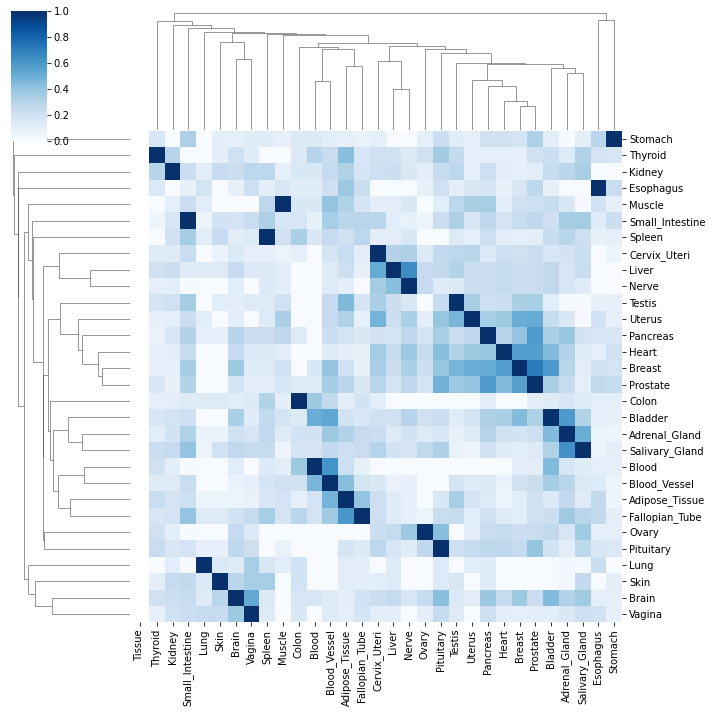

In [36]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

#from https://python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves

 
#Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.Tissue.unique(), ["orange","yellow","brown"]))
row_colors = df["Tissue"].map(my_palette)

# species = df.Tissue
# lut = dict(zip(species.unique(), "rbg"))
# row_colors = species.map(lut)

# plot
sns.clustermap(real_jacc_df, metric="correlation", method="single", cmap="Blues", standard_scale=1, 
              row_colors=row_colors)
plt.show()


In [60]:
reduced_tissues = ["Muscle", "Heart", "Pancreas", "Liver", 
                   "Kidney", "Lung", "Colon", "Esophagus", "Stomach", "Skin", "Brain"]

In [61]:
# reduced_tissues = []
# for i in range(len(unique_list)):
#     #print(i)
#     if unique_list[i] == "Muscle" or "Heart" or "Pancreas" or "Liver" or "Kidney" or "Lung" or "Colon" or "Esophagus" or "Stomach" or "Skin" or "Brain":
#         reduced_tissues.append(unique_list[i])

In [62]:
reduced_tissues

['Muscle',
 'Heart',
 'Pancreas',
 'Liver',
 'Kidney',
 'Lung',
 'Colon',
 'Esophagus',
 'Stomach',
 'Skin',
 'Brain']

In [64]:
reduced_df = pd.DataFrame(np.zeros((11,11)), index = reduced_tissues,
                                              columns = reduced_tissues)

In [65]:
for i in range(len(reduced_tissues)):
    #print(unique_list[i])
    for j in range(len(reduced_tissues)):
        #print(unique_list[j])
        reduced_df.iloc[i,j] = jaccard_set(reduced_tissues[i], reduced_tissues[j])

In [66]:
reduced_df

,Muscle,Heart,Pancreas,Liver,Kidney,Lung,Colon,Esophagus,Stomach,Skin,Brain
Muscle,1.000000,0.100000,0.272727,0.100000,0.090909,0.111111,0.100000,0.153846,0.083333,0.000000,0.000000
Heart,0.100000,1.000000,0.300000,0.250000,0.100000,0.000000,0.000000,0.076923,0.200000,0.000000,0.250000
Pancreas,0.272727,0.300000,0.777778,0.181818,0.166667,0.090909,0.083333,0.133333,0.153846,0.090909,0.300000
Liver,0.100000,0.250000,0.181818,1.000000,0.222222,0.125000,0.000000,0.000000,0.000000,0.125000,0.250000
Kidney,0.090909,0.100000,0.166667,0.222222,1.000000,0.111111,0.100000,0.000000,0.000000,0.250000,0.222222
Lung,0.111111,0.000000,0.090909,0.125000,0.111111,1.000000,0.125000,0.181818,0.000000,0.142857,0.125000
Colon,0.100000,0.000000,0.083333,0.000000,0.100000,0.125000,0.666667,0.076923,0.090909,0.125000,0.111111
Esophagus,0.153846,0.076923,0.133333,0.000000,0.000000,0.181818,0.076923,0.800000,0.230769,0.000000,0.076923
Stomach,0.083333,0.200000,0.153846,0.000000,0.000000,0.000000,0.090909,0.230769,1.000000,0.100000,0.090909
Skin,0.000000,0.000000,0.090909,0.125000,0.250000,0.142857,0.125000,0.000000,0.100000,1.000000,0.285714


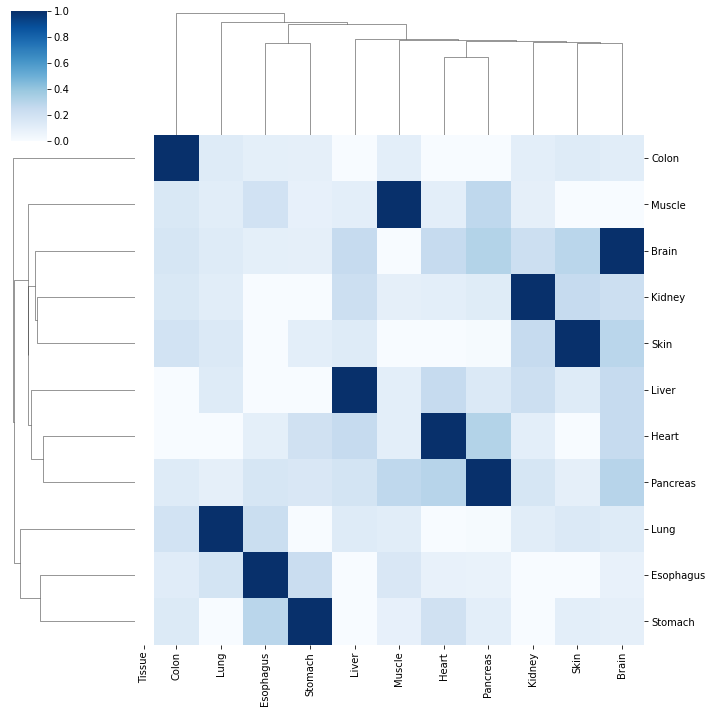

In [67]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

#from https://python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves

 
#Prepare a vector of color mapped to the 'cyl' column
# my_palette = dict(zip(df.Tissue.unique(), ["orange","yellow","brown"]))
# row_colors = df["Tissue"].map(my_palette)

# species = df.Tissue
# lut = dict(zip(species.unique(), "rbg"))
# row_colors = species.map(lut)

# plot
sns.clustermap(reduced_df, metric="correlation", method="single", cmap="Blues", standard_scale=1, 
              row_colors=row_colors)
plt.show()


# practice w box plt (figure 3)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

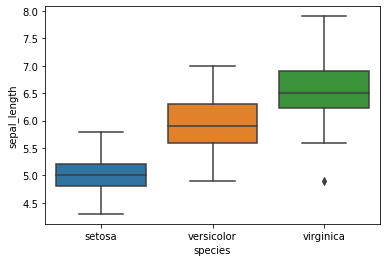

In [4]:
import seaborn as sns
df = sns.load_dataset('iris')

sns.boxplot( x=df["species"], y=df["sepal_length"] )

ok so i want each tissue and then the fugue score for each

In [94]:
fig_3_data = pd.read_csv("../data/fig_3_data_fugue_scores_for_six_tissues.csv")

In [108]:
fig_3_data

,Tissue,Description,ZScore,MeanExp,Breadth,CV,NeighborMeanBreadth,NeighborMeanZscore,Label,Probability,default_rank,max_rank,NA_bottom,pct_rank
0,Heart,SDHA,1.993528,243.288498,0.846690,0.579540,0.264830,-0.377133,P,0.985383,0.0,0.0,0.0,0.0
1,Heart,TNNT2,3.955485,2449.070800,1.000000,0.458229,0.418467,0.205908,P,0.982098,0.0,0.0,0.0,0.0
2,Heart,ACTN2,1.199822,507.696777,0.997677,0.604202,0.347131,-0.295513,P,0.976608,0.0,0.0,0.0,0.0
3,Heart,SCN5A,3.606891,38.107166,0.997677,0.631969,0.358164,-0.026341,P,0.974489,0.0,0.0,0.0,0.0
4,Heart,MYH6,3.016343,2784.512700,0.997677,1.017318,0.240589,-0.503202,P,0.971880,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Testis,NANOS1,-0.306643,1.460238,0.279778,0.302469,0.670360,0.849867,U,0.186065,0.0,0.0,0.0,0.0
506,Testis,HOXB13,-0.105192,0.194483,0.997230,0.522857,0.992613,0.576184,N,0.167533,0.0,0.0,0.0,0.0
507,Testis,CATSPER2,4.448299,24.798389,1.000000,0.325885,1.000000,-0.054621,U,0.116311,0.0,0.0,0.0,0.0
508,Testis,CFTR,-0.067128,1.729463,1.000000,0.270751,0.797529,0.968987,N,0.091395,0.0,0.0,0.0,0.0


In [109]:
fig_3_data = fig_3_data[["Tissue", "Description", "ZScore", "MeanExp", "Breadth", 
                        "CV", "NeighborMeanBreadth", "NeighborMeanZscore", "Label", "Probability"]]






In [110]:
#DIDNT USE
fig_3_data = fig_3_data.drop(["Unnamed: 10", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", 
                              "Unnamed: 17", "Unnamed: 18", "Unnamed: 19","Unnamed: 20", "Unnamed: 21", "Unnamed: 22", 
                              "Unnamed: 23", "Unnamed: 24","Unnamed: 25"], axis=1)




KeyError: "['Unnamed: 10' 'Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14' 'Unnamed: 15'\n 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18' 'Unnamed: 19' 'Unnamed: 20'\n 'Unnamed: 21' 'Unnamed: 22' 'Unnamed: 23' 'Unnamed: 24' 'Unnamed: 25'] not found in axis"

In [111]:
fig_3_data = fig_3_data.dropna()

In [112]:
fig_3_data

,Tissue,Description,ZScore,MeanExp,Breadth,CV,NeighborMeanBreadth,NeighborMeanZscore,Label,Probability
0,Heart,SDHA,1.993528,243.288498,0.846690,0.579540,0.264830,-0.377133,P,0.985383
1,Heart,TNNT2,3.955485,2449.070800,1.000000,0.458229,0.418467,0.205908,P,0.982098
2,Heart,ACTN2,1.199822,507.696777,0.997677,0.604202,0.347131,-0.295513,P,0.976608
3,Heart,SCN5A,3.606891,38.107166,0.997677,0.631969,0.358164,-0.026341,P,0.974489
4,Heart,MYH6,3.016343,2784.512700,0.997677,1.017318,0.240589,-0.503202,P,0.971880
...,...,...,...,...,...,...,...,...,...,...
505,Testis,NANOS1,-0.306643,1.460238,0.279778,0.302469,0.670360,0.849867,U,0.186065
506,Testis,HOXB13,-0.105192,0.194483,0.997230,0.522857,0.992613,0.576184,N,0.167533
507,Testis,CATSPER2,4.448299,24.798389,1.000000,0.325885,1.000000,-0.054621,U,0.116311
508,Testis,CFTR,-0.067128,1.729463,1.000000,0.270751,0.797529,0.968987,N,0.091395


In [113]:
iris_virginica = iris_data[iris_data["petal length"] >= 5.0]
iris_virginica

NameError: name 'iris_data' is not defined

In [114]:
heart_df = fig_3_data[fig_3_data["Tissue"] == "Heart"]
breast_df = fig_3_data[fig_3_data["Tissue"] == "Breast"]
lung_df = fig_3_data[fig_3_data["Tissue"] == "Lung"]
muscle_df = fig_3_data[fig_3_data["Tissue"] == "Muscle"]
ovary_df = fig_3_data[fig_3_data["Tissue"] == "Ovary"]
testis_df = fig_3_data[fig_3_data["Tissue"] == "Testis"]


NameError: name 'stars_df' is not defined

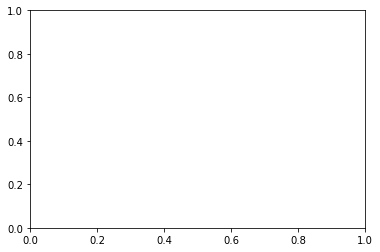

In [115]:
#from another notebook to remind myself of syntax !
f,ax = plt.subplots()
sns.scatterplot(stars_df["Temperature (K)"], stars_df["Luminosity (L/Lo)"], hue = stars_df["Star type"])

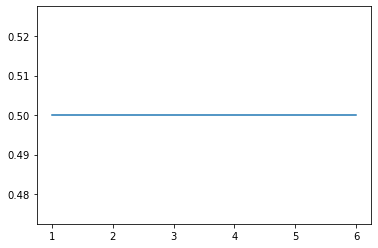

In [116]:
x = [1, 2, 3, 4, 5, 6]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
plt.plot(x,y)

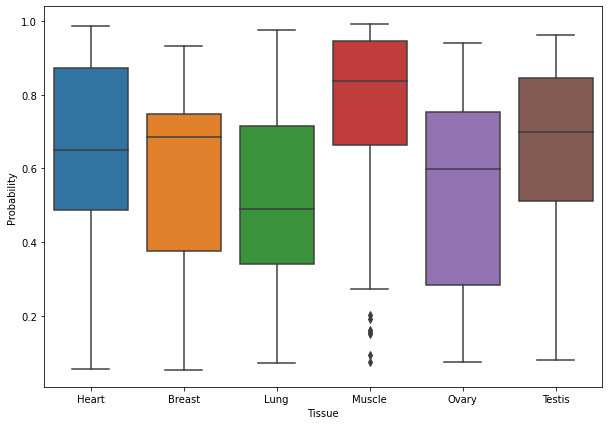

In [134]:
plt.subplots(figsize=(10,7));
sns.boxplot( x=fig_3_data["Tissue"], y=fig_3_data["Probability"] );
#plt.plot(x,y, color="black")

ok. so clearly they are only plotting a subset of the data. next step is to figure out what subset that is. top 20? maybe ? even then, the range of the data points on their plot is 0.6 - 0.75 ish. so what is up ?! grr.

ok i think first step is splitting up the six tissues. then only take top 20? or only that are in 0.6-0.75 range? and the rejoin the six different df, then plot

In [118]:
heart_first_twenty = heart_df.head(20)
lung_first_twenty = lung_df.head(20)

In [119]:

#frames = [df1, df2, df3]
all_tissues_top_twenty_list = [heart_first_twenty, lung_first_twenty]

result = pd.concat(all_tissues_top_twenty_list)

In [120]:
result

,Tissue,Description,ZScore,MeanExp,Breadth,CV,NeighborMeanBreadth,NeighborMeanZscore,Label,Probability
0,Heart,SDHA,1.993528,243.288498,0.846690,0.579540,0.264830,-0.377133,P,0.985383
1,Heart,TNNT2,3.955485,2449.070800,1.000000,0.458229,0.418467,0.205908,P,0.982098
2,Heart,ACTN2,1.199822,507.696777,0.997677,0.604202,0.347131,-0.295513,P,0.976608
3,Heart,SCN5A,3.606891,38.107166,0.997677,0.631969,0.358164,-0.026341,P,0.974489
4,Heart,MYH6,3.016343,2784.512700,0.997677,1.017318,0.240589,-0.503202,P,0.971880
5,Heart,TMOD1,1.095912,106.306709,0.868757,0.568210,0.236406,-0.418826,U,0.971417
6,Heart,MYBPC3,3.806678,1131.208010,1.000000,0.550642,0.599746,0.634618,P,0.971307
7,Heart,TPM1,1.893656,1118.816280,0.965157,0.539228,0.266024,-0.379341,P,0.966239
8,Heart,GPD1L,1.222968,80.982254,0.773519,0.720470,0.474564,0.206171,P,0.963847
9,Heart,CASQ2,2.746341,439.576233,0.996516,0.644865,0.205848,-0.555905,P,0.961014


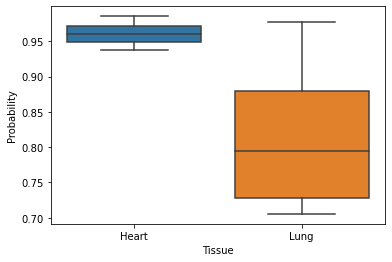

In [121]:
sns.boxplot( x=result["Tissue"], y=result["Probability"] );
#plt.plot(x,y, color="black")

ok. so it doesn't look like theyre using the top twenty values...maybe just take the ones that are in the apparent range in the paper's graph and see if mine matches up?

In [122]:
#heart_df = fig_3_data[fig_3_data["Tissue"] == "Heart"]
#iris_versicolor = iris_data[(iris_data["petal length"] <= 5.0) & (iris_data["petal length"] >= 2.5)]


heart_df_in_range = heart_df[(heart_df["Probability"] <= 0.72) & (heart_df["Probability"] >= 0.65)]
lung_df_in_range = lung_df[(lung_df["Probability"] <= 0.75) & (lung_df["Probability"] >= 0.60)]

In [123]:
all_tissues_in_range = [heart_df_in_range, lung_df_in_range]

result1 = pd.concat(all_tissues_in_range)

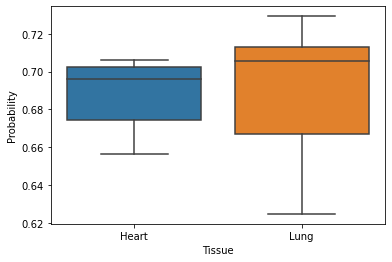

In [124]:
sns.boxplot( x=result1["Tissue"], y=result1["Probability"] );


alright. they are definitely using a range of the data. i don't think it is very scientifically accurate to just make my own range... i'm def close but there has to be some other place in the paper they mention only using a specific range? ask arjun. why would they only use a subset of the data??????

In [125]:
fig_3_data['default_rank'] = fig_3_data['Probability'].rank()
fig_3_data['max_rank'] = fig_3_data['Probability'].rank(method='max')
fig_3_data['NA_bottom'] = fig_3_data['Probability'].rank(na_option='bottom')
fig_3_data['pct_rank'] = fig_3_data['Probability'].rank(pct=True)

In [126]:
fig_3_data

,Tissue,Description,ZScore,MeanExp,Breadth,CV,NeighborMeanBreadth,NeighborMeanZscore,Label,Probability,default_rank,max_rank,NA_bottom,pct_rank
0,Heart,SDHA,1.993528,243.288498,0.846690,0.579540,0.264830,-0.377133,P,0.985383,498.0,498.0,498.0,0.996
1,Heart,TNNT2,3.955485,2449.070800,1.000000,0.458229,0.418467,0.205908,P,0.982098,494.0,494.0,494.0,0.988
2,Heart,ACTN2,1.199822,507.696777,0.997677,0.604202,0.347131,-0.295513,P,0.976608,485.0,485.0,485.0,0.970
3,Heart,SCN5A,3.606891,38.107166,0.997677,0.631969,0.358164,-0.026341,P,0.974489,484.0,484.0,484.0,0.968
4,Heart,MYH6,3.016343,2784.512700,0.997677,1.017318,0.240589,-0.503202,P,0.971880,480.0,480.0,480.0,0.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Testis,NANOS1,-0.306643,1.460238,0.279778,0.302469,0.670360,0.849867,U,0.186065,34.0,34.0,34.0,0.068
506,Testis,HOXB13,-0.105192,0.194483,0.997230,0.522857,0.992613,0.576184,N,0.167533,30.0,30.0,30.0,0.060
507,Testis,CATSPER2,4.448299,24.798389,1.000000,0.325885,1.000000,-0.054621,U,0.116311,19.0,19.0,19.0,0.038
508,Testis,CFTR,-0.067128,1.729463,1.000000,0.270751,0.797529,0.968987,N,0.091395,12.0,12.0,12.0,0.024


In [127]:
len(fig_3_data.default_rank.unique())

500

In [128]:
heart_df = fig_3_data[fig_3_data["Tissue"] == "Heart"]
breast_df = fig_3_data[fig_3_data["Tissue"] == "Breast"]
lung_df = fig_3_data[fig_3_data["Tissue"] == "Lung"]
muscle_df = fig_3_data[fig_3_data["Tissue"] == "Muscle"]
ovary_df = fig_3_data[fig_3_data["Tissue"] == "Ovary"]
testis_df = fig_3_data[fig_3_data["Tissue"] == "Testis"]


In [135]:
fig_3_p_labels = fig_3_data[fig_3_data["Label"] == "P"]

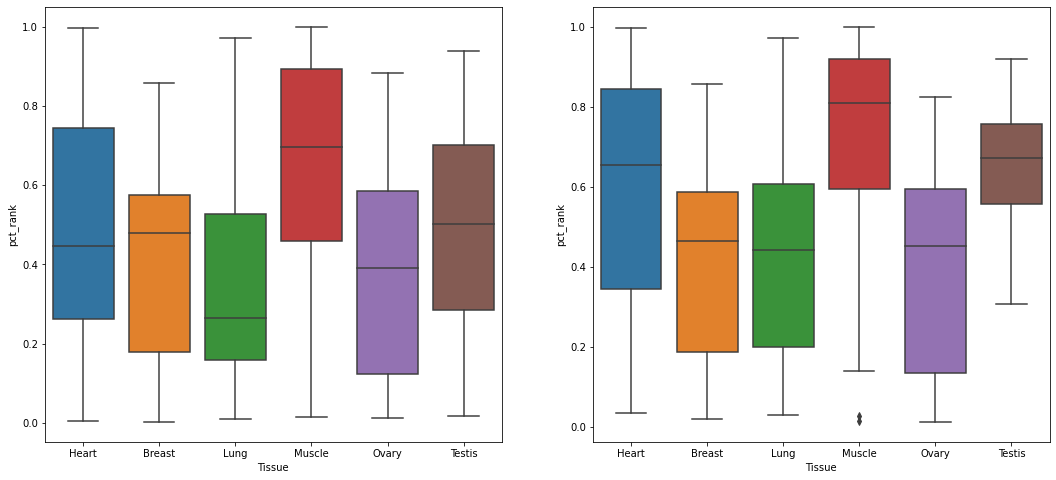

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(ax=axes[0], x=fig_3_data["Tissue"], y=fig_3_data["pct_rank"] )
sns.boxplot(ax=axes[1], x=fig_3_p_labels["Tissue"], y=fig_3_p_labels["pct_rank"] );
#plt.plot(x,y, color="black")

take away from above is that even when you don't split up the original data frame, find percent rank for values when they are just in tissue specific dataframes, then only plot the values with p label...still dont get much. plot with only p values buttttt data was split into tissue specific and then percent rank was found is in fig_3_mess_around file